In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.drop('CustomerID',inplace=True,axis=1)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.columns=['Gender','Age','Income','Score']

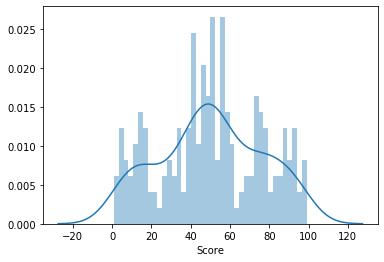

In [7]:
sns.distplot(df['Score'],bins=40)

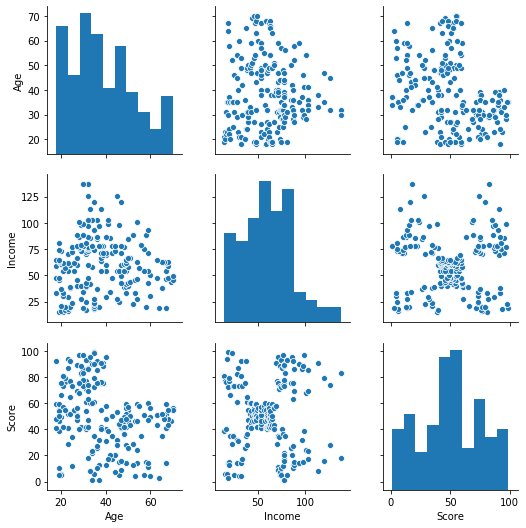

In [8]:
sns.pairplot(df)

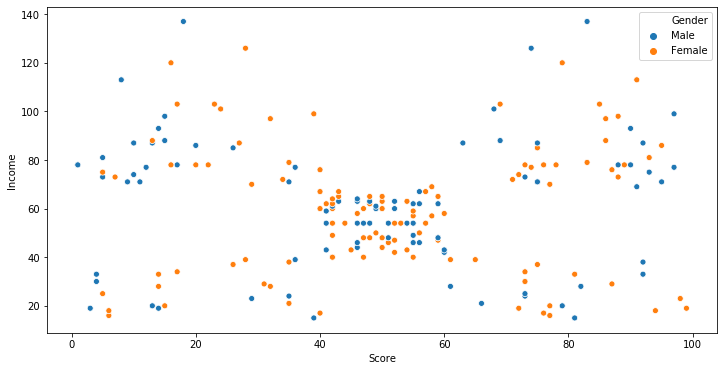

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Score',y='Income',data=df,hue='Gender')

In [10]:
df=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


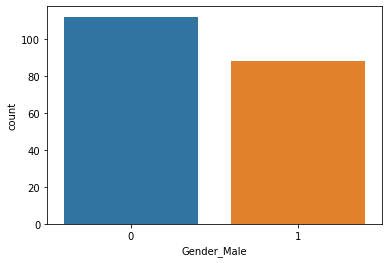

In [12]:
sns.countplot(df['Gender_Male'])

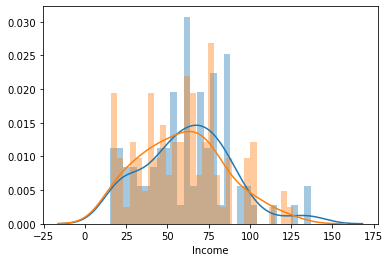

In [13]:
sns.distplot(df[df['Gender_Male']==1]['Income'],bins=30)
sns.distplot(df[df['Gender_Male']==0]['Income'],bins=30)

In [14]:
from sklearn.cluster import KMeans

In [15]:
Age=df[['Age' , 'Score']]
elbow=[]
for n in range(1 , 12):
    model = (KMeans(n_clusters = n,random_state= 0) )
    model= model.fit(Age)
    elbow.append(model.inertia_)

Text(0.5, 0, '# Cluster')

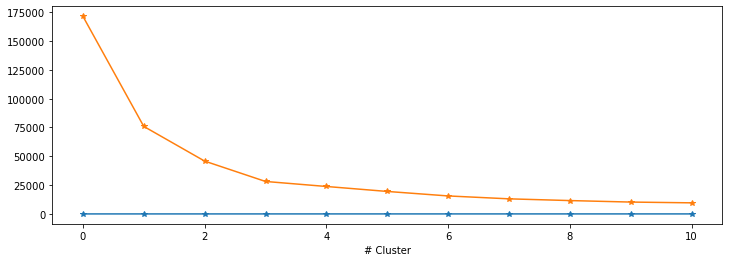

In [16]:
curve= [i for i in enumerate(elbow)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')
plt.xlabel('# Cluster')

In [17]:
Income=df[['Income' , 'Score']]
elbow=[]
for n in range(1 , 12):
    model = (KMeans(n_clusters = n,random_state= 0) )
    model= model.fit(Income)
    elbow.append(model.inertia_)

In [58]:
model = KMeans(n_clusters=2,random_state=0)
clusters=model.fit_predict(Income)
centroid=model.cluster_centers_

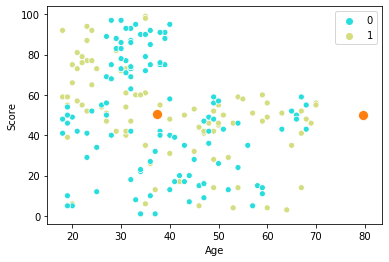

In [59]:
sns.scatterplot(x='Age',y='Score',data=df,hue=clusters,palette='rainbow')
sns.scatterplot(centroid[:,0],centroid[:,1],s= 100)

Text(0.5, 0, '# Cluster')

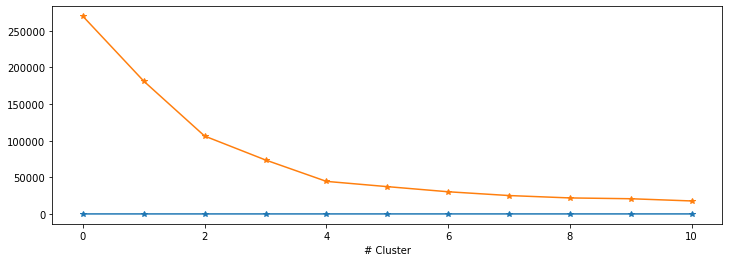

In [20]:
curve= [i for i in enumerate(elbow)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')
plt.xlabel('# Cluster')

In [21]:
model = KMeans(n_clusters=5,random_state=0)
clusters=model.fit_predict(Income)
centroid=model.cluster_centers_

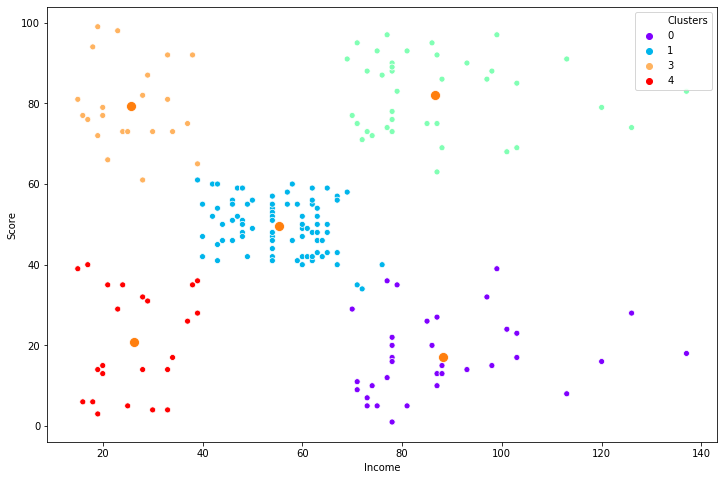

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Income',y='Score',data=df,hue='Clusters',palette='rainbow')
sns.scatterplot(centroid[:,0],centroid[:,1],s= 100)

In [24]:
clusters=pd.DataFrame(clusters)
clusters.columns=['Clusters']

In [25]:
df=pd.concat([df,clusters],axis=1)

In [26]:
df

,Age,Income,Score,Gender_Male,Clusters
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,0
197,32,126,74,1,2
198,32,137,18,1,0


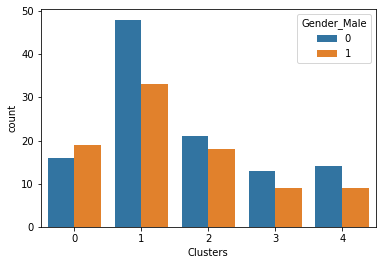

In [28]:
sns.countplot(df['Clusters'],hue=df['Gender_Male'])

In [29]:
mean=df.groupby('Clusters').mean()[['Income','Score']]

In [30]:
mean

,Income,Score
Clusters,,
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
std=scaler.fit_transform(df[['Income','Score']])

In [37]:
from scipy.cluster.hierarchy import linkage,dendrogram

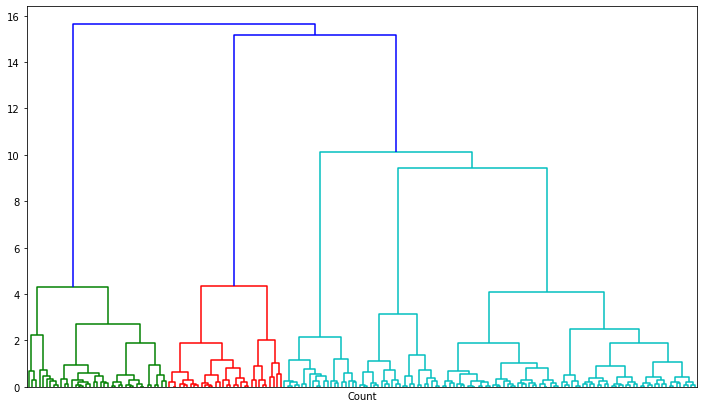

In [42]:
cluster = linkage(std,method='ward')
plt.figure(figsize=(12,7))
plt.xlabel("Count")
dendrogram(cluster,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=10);
plt.show()